In [1]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('../Resources/USD_per_Euro_Hourly_Mid Prices.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Gmt time')
df.head(2)

,Rate
Gmt time,
2014-01-01 00:00:00,1.37439
2014-01-01 01:00:00,1.37439


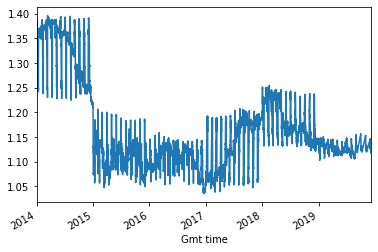

In [3]:
# Hourly EUR to USD exchange rates
df.Rate.plot()

In [4]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Return'] = df.Rate.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Rate,Return
Gmt time,,
2014-01-01,1.374557,0.167748
2014-01-02,1.348635,-0.006302
2014-01-03,1.380160,-0.001811
2014-01-04,1.378907,0.141308
2014-01-05,1.387214,0.014192


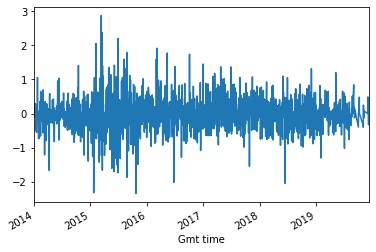

In [5]:
df.Return.plot()

# GARCH

In [6]:
import arch as arch
from arch import arch_model

In [ ]:
# Create the GARCH model
model = arch_model(df.Return, mean="Zero", vol="GARCH", p=2, q=2)
results = model.fit(disp="off")

In [8]:
# Output the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1096.83
Distribution:                  Normal   AIC:                           2203.66
Method:            Maximum Likelihood   BIC:                           2231.82
                                        No. Observations:                 2062
Date:                Thu, Sep 12 2019   Df Residuals:                     2057
Time:                        14:37:01   Df Model:                            5
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.1420e-03  1.794e-02  6.367e-02      0.949 [-3.401e-02,3.629e-02]
alpha[1]       0.0241      0.523  4.616e-02      0.963      [ -1.000,  1.048]
alpha[2]   1.4466e-13      0.921  1.571e-13      1.000      [ -1.805,  1.805]
beta[1]        0.3907     22.396  1.745e-02      0.986      [-43.505, 44.287]
beta[2]        0.5789     21.906  2.643e-02      0.979      [-42.355, 43.513]
=============================================================================

Covariance estimator: robust
"""

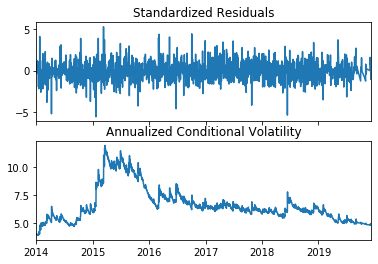

In [9]:
# Plot the model estimate of the annualized volatility
fig = results.plot(annualize='D')

# Forecasting from GARCH

In [10]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-12-08'

In [11]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 5
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

In [12]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Gmt time,,,,,
2019-12-08,4.86332,4.877845,4.883856,4.894722,4.902688


# Visualizing the forecast

In [13]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Gmt time,2019-12-08
h.1,4.863320
h.2,4.877845
h.3,4.883856
h.4,4.894722
h.5,4.902688


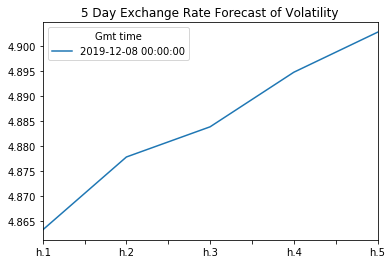

In [14]:
# Plot the final forecast
final.plot(title="5 Day Exchange Rate Forecast of Volatility")

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: Based on the upward trend in the forecast plot, the exchange rate risk is expected to increase.